<a href="https://colab.research.google.com/github/favourphilic/Deep-Learning/blob/main/Predict_MNIST_Dataset_withCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the torchvision.datasets.MNIST() train and test datasets.

2. Visualize at least 5 different samples of the MNIST training dataset.

3. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

4. Create baseline model and other model variants  and see which   capable of fitting on the MNIST dataset.

5. Train the model you built on CPU and GPU and see how long it takes on each.

6. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

7. Plot a confusion matrix comparing your model's predictions to the truth labels.

8. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

9. Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
Then plot some predictions where the model was wrong alongside what the label of the image should've been.

10. After visualing these predictions do you think it's more of a modelling error or a data error?
As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## 1.0 Loading the MNIST Dataset.
* MNIST stand for Modified National Institute of Standards and Technology.
* We can get the preloaded MNIST dataset from torchvision.datasets

In [ ]:
import torch   #Import PyTorch
from torch import nn
import torchvision   #Import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt # Import matplotlib for visualization

* Let's download the MNIST dataset to a root folder called data.

In [ ]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



* Now that we have our dataset, lets take a look at one of them.

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image.shape        #To obtain the shape of the data

torch.Size([1, 28, 28])

* Our sample image has one channel which means the dataset is composed of grayscale images.

Text(0.5, 1.0, '5')

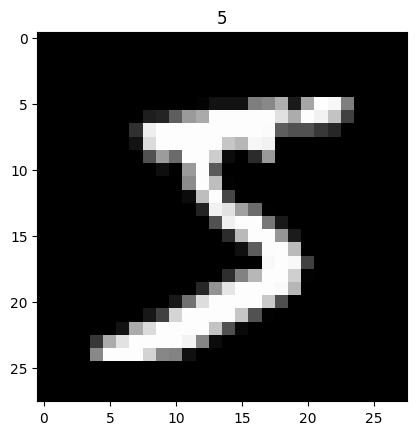

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(label)

* The MNIST dataset is a collection of hand written images.

In [ ]:
# get the length of the train and test data
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
#get the classes/labels associated with each datapoint
classname  = train_data.classes
classname

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

* Of course, this task is definitely a multicalss classfication problem, with 10 different labels from one to ten.

## 2.0 Visualize at least 5 different samples of the MNIST training dataset.

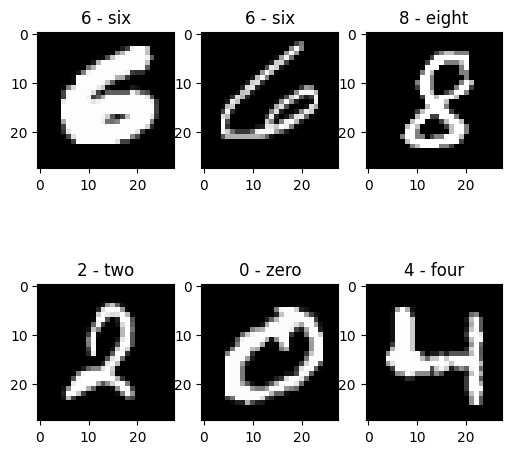

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(6, 6))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
  randomint = torch.randint(0, len(train_data), size=[1]).item()
  sample, label = train_data[randomint]
  fig.add_subplot(rows, cols, i)
  plt.imshow(sample.squeeze(), cmap='gray')
  plt.title(classname[label])

## 3.0 Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32 # Setup the batch size hyperparameter
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True ) 
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f0ae4d43430>, <torch.utils.data.dataloader.DataLoader object at 0x7f0ae4d43e50>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 4.0 Create baseline model and other model variants  and see which   capable of fitting on the MNIST dataset.

In [ ]:
#Check what is contained in the trainloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### 4.1 Baseline Model

In [ ]:
from torch import nn
class MNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
model0= MNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(classname))
model0

MNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

* Next step is to set up optimizer and loss function.
* I will also import the helper_function module containing a number of evaluation metrics as I don't want to import from the TorchMetric package.

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

* Before going forward, I will functionize the train and test step to avoid writing same code several time.

In [ ]:
# Setup device agnostic code. This will ensure that our code can run on any device whether on the CPU or GPU
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader,
              model,
              loss_fn,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode and turn on the inference mode, this will shut down some PyTorch operation.
    with torch.inference_mode(): 
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

* Setting up a timing function

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
torch.manual_seed(42)

# Import tqdm for progress bar
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.40215 | Train accuracy: 88.57%
Test loss: 0.29455 | Test accuracy: 91.59%

Epoch: 1
---------
Train loss: 0.30785 | Train accuracy: 91.36%
Test loss: 0.28631 | Test accuracy: 91.89%

Epoch: 2
---------
Train loss: 0.29567 | Train accuracy: 91.65%
Test loss: 0.28619 | Test accuracy: 92.03%

Train time on cpu: 33.758 seconds


## 6.0  Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
# Let's define a function to perform the evaluation
torch.manual_seed(42)
def eval_model(model, data_loader, loss_fn, accuracy_fn, device: torch.device = device):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) 
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [ ]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'MNISTModelV0',
 'model_loss': 0.2861882746219635,
 'model_acc': 92.03274760383387}

### Building model1 with non linearity

In [ ]:
# Create a model with non-linear and linear layers
class MNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 =MNISTModelV1(input_shape=784, hidden_units=10,output_shape=len(classname) ).to(device) 

next(model_1.parameters()).device 

device(type='cpu')

In [ ]:
# Set up the loss and optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
train_time_start_on_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.49361 | Train accuracy: 85.56%
Test loss: 0.28641 | Test accuracy: 91.74%

Epoch: 1
---------
Train loss: 0.27492 | Train accuracy: 91.96%
Test loss: 0.24691 | Test accuracy: 92.66%

Epoch: 2
---------
Train loss: 0.24574 | Train accuracy: 92.73%
Test loss: 0.24162 | Test accuracy: 92.76%

Train time on cpu: 33.611 seconds


In [ ]:
# Calculate model 1(Which has non linearity) results on test dataset
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'MNISTModelV1',
 'model_loss': 0.24162016808986664,
 'model_acc': 92.76158146964856}

* Lastly, since the task is an image problem, the last mosel I will be training the dataset on will be a CNN, which is good fro image classification problem.
 * CNN can help find pattern in visual data, even while reducing it from a higher dimension to small dimension.

In [ ]:
# Create a CNN
class MNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2) )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape))
    
    def forward(self, x):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [ ]:
torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(classname)).to(device)
model_2

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#set up the loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
train_time_start_on_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, model=model_2, loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader,model=model_2,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

train_time_end_on_cpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.26560 | Train accuracy: 91.33%
Test loss: 0.07672 | Test accuracy: 97.57%

Epoch: 1
---------
Train loss: 0.06840 | Train accuracy: 97.84%
Test loss: 0.04390 | Test accuracy: 98.55%

Epoch: 2
---------
Train loss: 0.05379 | Train accuracy: 98.38%
Test loss: 0.04583 | Test accuracy: 98.52%

Train time on cpu: 150.406 seconds


In [ ]:
# Calculate model 1(Which has non linearity) results on test dataset
model_2_results = eval_model(model=model_2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.04583347961306572,
 'model_acc': 98.5223642172524}

## Comparing the model results

In [ ]:
import pandas as pd
results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
results

,model_name,model_loss,model_acc
0,MNISTModelV0,0.286188,92.032748
1,MNISTModelV1,0.241620,92.761581
2,MNISTModelV2,0.045833,98.522364


* We shouldn't be surprised about the accuracy of the CNN model. Also, our non-linear model perform slightly better than the baseline model.

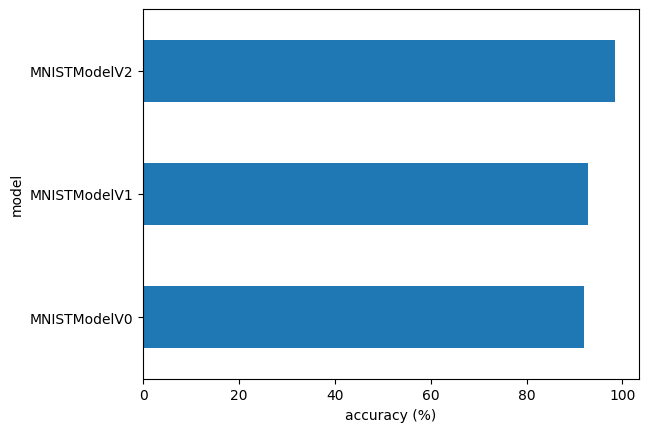

In [ ]:
results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 6. Make predictions using your best model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
# Lets create a make prediction function, to which we can pass the model and other data
def make_prediction( model, data, device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit= model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)



In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({classname[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


### Now we can use our make_prediction fucntion to make prediction of the test sample.

In [ ]:
pred_probs= make_prediction(model=model_2, data=test_samples, device=device)
pred_probs[:3]

tensor([[3.6251e-10, 4.4575e-07, 9.9999e-01, 2.1963e-06, 3.2357e-14, 5.0271e-15,
         3.7266e-12, 1.2633e-08, 2.6849e-06, 1.2846e-10],
        [2.6269e-07, 9.9502e-01, 2.0606e-06, 8.5102e-06, 4.9872e-05, 1.3000e-03,
         2.0954e-03, 9.6108e-06, 1.3858e-03, 1.3274e-04],
        [3.0472e-04, 8.3266e-10, 9.9728e-01, 2.4045e-03, 6.6366e-11, 4.6402e-09,
         5.8847e-10, 7.4299e-06, 5.4406e-06, 1.5027e-06]])

In [ ]:
#To get the index to which the sample belong too, we will use the torch.argmax on the prediction.
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [ ]:
#Comparing the actual labels to the predictions
test_labels, pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1]))

### Visualize the predictions.

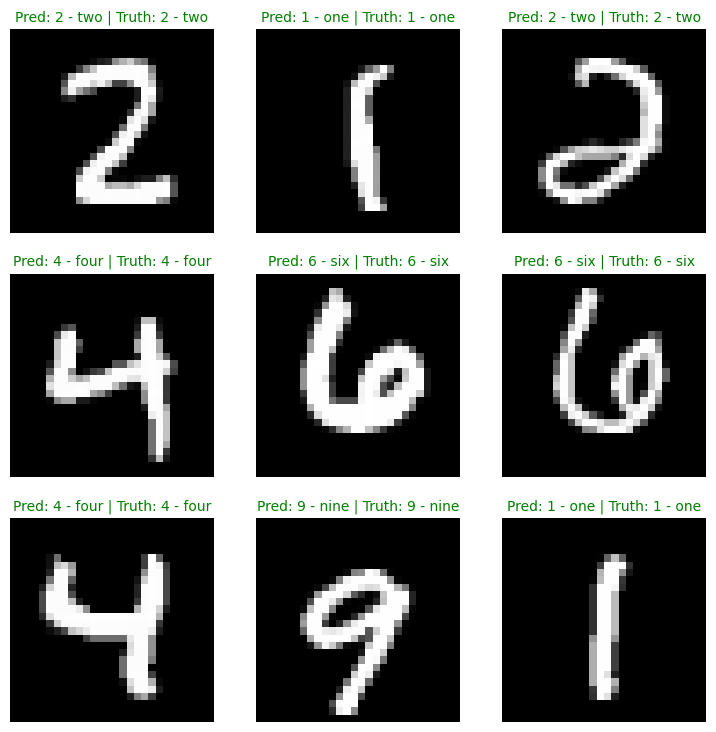

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = classname[pred_classes[i]]
  truth_label = classname[test_labels[i]] 
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 7.0 Lets plot a Confusion Matrix.
* Make a confusion matrix using torch.ConfusionMatrix.
* Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
mlxtend version: 0.21.0


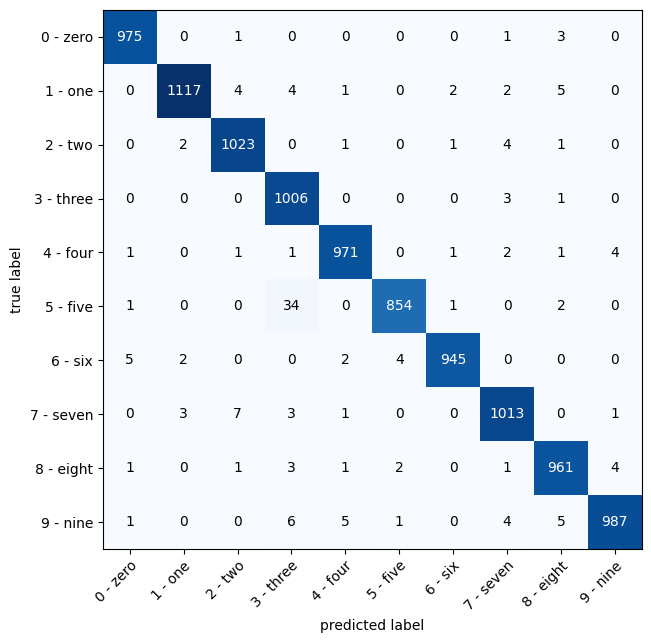

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classname), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=classname, # turn the row and column labels into class names
    figsize=(10, 7)
);

* Looks like our model is doing pretty well.
* The model get confused more on letter 5 as some of it are classified as 3. This is expected as the two letter look quite similar, especially if not properly written.
* The model adequately classfy majority of letter 1.

In [ ]:
#Next task is svae the model.
#Reload saved model and used for predictor.